In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
 #Step 1: Import Libraries and Load Dataset
df = pd.read_csv("Cleaned_Telecom_Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Step 2: Explore the Dataset (Check structure, columns, and basic statistics)
df.shape


(7043, 21)

In [4]:
df.size

147903

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Step 3: Handle Missing Values
# Checking for missing values
print("Missing Values:\n", df.isnull().sum())

# df[column].fillna(df[column].mode()[0], inplace=True)

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
# Step 4: Remove Duplicate Records
df.duplicated().sum()

# Dropping duplicates
#df.drop_duplicates(inplace=True)

0

In [9]:
# Step 5: Check for Inconsistent Data (Inconsistent formatting or spelling variations)
# Converting all object-type columns to lowercase to standardize formatting
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.lower()

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,yes,no,1,no,no phone service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one year,no,mailed check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no phone service,dsl,yes,...,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,no,...,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


In [11]:
# Step 6: Convert Columns to Correct Data Types
df['Churn'] = df['Churn'].replace({'yes': 1, 'no': 0})

C:\Users\DELL\AppData\Local\Temp\ipykernel_4348\1075061348.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'yes': 1, 'no': 0})


In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,yes,no,1,no,no phone service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one year,no,mailed check,56.95,1889.5,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no phone service,dsl,yes,...,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,no,...,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,1


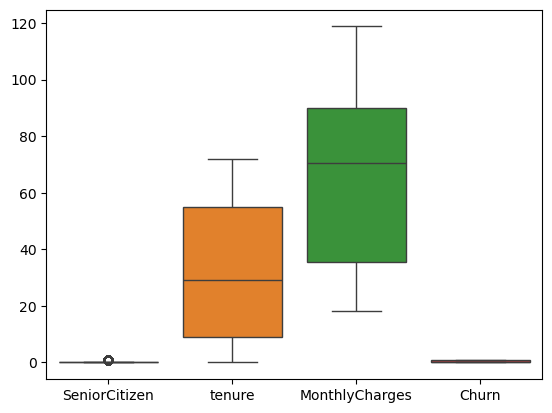

In [13]:
sns.boxplot(df)
plt.show()

In [14]:
# Step 7: Identify and Handle Outliers
# Using the IQR method to identify outliers

# Q1 = df[column].quantile(0.25)
# Q3 = df[column].quantile(0.75)

#IQR = Q3 - Q1

# # Define the lower and upper bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR


# # Remove outliers
# df_cleand = df[(df['column'] >= lower_bound) & (df['column'] <= upper_bound)]

In [15]:
# sns.boxplot(x='Churn', y='TotalCharges', data=df_cleand)

In [16]:
# Step 8: Perform Feature Engineering (Creating New Features)
# Example: Creating a new feature for average monthly charges based on total charges and tenure
df['MonthlyCharges'] = df['MonthlyCharges'] / df['tenure']
df['MonthlyCharges']

0       29.850000
1        1.675000
2       26.925000
3        0.940000
4       35.350000
          ...    
7038     3.533333
7039     1.433333
7040     2.690909
7041    18.600000
7042     1.600758
Name: MonthlyCharges, Length: 7043, dtype: float64

In [17]:
# Step 10: Split the Dataset into Training and Testing Sets
from sklearn.model_selection import train_test_split

In [72]:
# Assuming 'churn' is the target variable
X = df.drop(columns=['Churn'], axis = 1)
y = df['Churn']


In [74]:
X

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-vhveg,female,0,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.850000,29.85
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,1.675000,1889.5
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,26.925000,108.15
3,7795-cfocw,male,0,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),0.940000,1840.75
4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,35.350000,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,no,yes,yes,yes,yes,one year,yes,mailed check,3.533333,1990.5
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber optic,no,yes,yes,no,yes,yes,one year,yes,credit card (automatic),1.433333,7362.9
7040,4801-jzazl,female,0,yes,yes,11,no,no phone service,dsl,yes,no,no,no,no,no,month-to-month,yes,electronic check,2.690909,346.45
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber optic,no,no,no,no,no,no,month-to-month,yes,mailed check,18.600000,306.6


In [76]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [84]:
model = LogisticRegression(random_state=42)

In [88]:
#model.fit(X_train, y_train)

In [90]:
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Model Accuracy:", accuracy)

In [26]:
# # Additional metrics for better evaluation
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))